<a href="https://colab.research.google.com/github/usuariodf/Portafolio-Data-Science/blob/main/Proy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Tema: Detección de Fraude en Tarjetas de Crédito mediante Clasificación Binaria

Descripción del Problema: En este examen, se presenta un desafío de clasificación binaria relacionado con la detección de fraude en tarjetas de crédito. El objetivo es crear un modelo que logre la mejor evaluación posible utilizando una curva ROC y que supere la métrica del modelo actual, que tiene un valor de 0.85889. Cualquier mejora por encima de este número será bienvenida.

 Datos Disponibles: Se proporcionan dos conjuntos de datos: uno para entrenamiento y otro para prueba. Estos datos contienen información relevante para el problema en cuestión.  

Formato de Evaluación Interna: Además de los conjuntos de datos, se debe generar un formato específico para realizar una evaluación interna con los directivos. Este formato permitirá presentar los resultados obtenidos y cualquier análisis adicional realizado durante el proceso de desarrollo del modelo.  

Se espera que utilices tu conocimiento y habilidades en clasificación binaria para abordar el problema planteado y presentar soluciones que superen la métrica actual. La detección de fraude en tarjetas de crédito es un desafío importante en el ámbito financiero, y el desarrollo de modelos más efectivos puede tener un impacto significativo en la seguridad financiera de las personas y las instituciones. ¡Buena suerte!

## <a id='toc1_1_'></a>[Enfoque 1: Modelos de Machine Learning](#toc0_)

In [ ]:
pip install catboost

In [ ]:
pip install lightgbm

## <a id='toc1_2_'></a>[Carga de librerias y de datos](#toc0_)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
data = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')

## <a id='toc1_2_'></a>[Primer vistazo de los datos](#toc0_)

In [ ]:
data.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [ ]:
data_test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [ ]:
nulos_y_duplicados = data[data.duplicated() & data.isnull().any(axis=1)]
print(nulos_y_duplicados)

Empty DataFrame
Columns: [id, Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 32 columns]


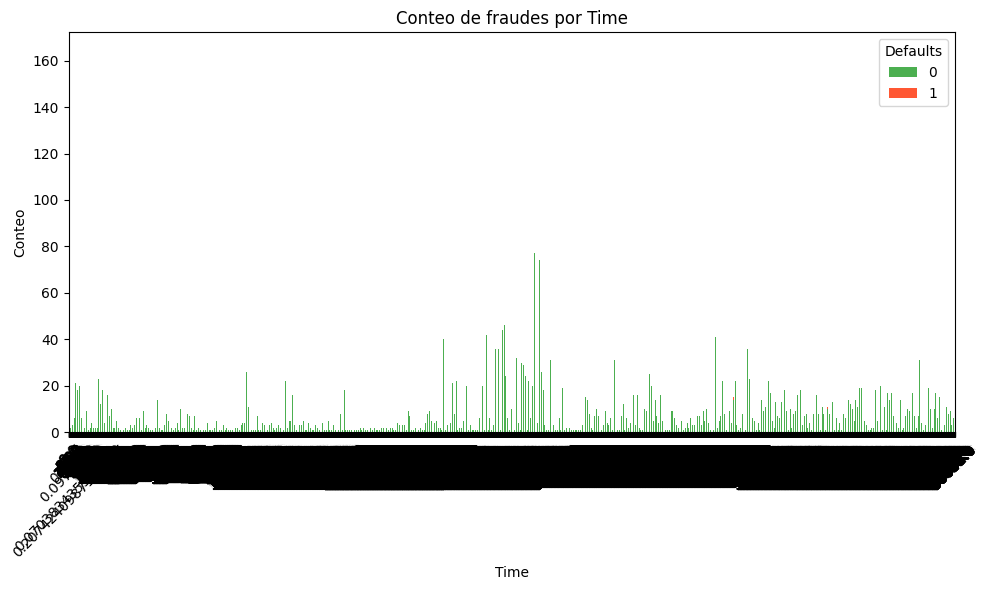

In [ ]:
#Visualizar y análizar el poder predictivo de la variable Time
import pandas as pd
import matplotlib.pyplot as plt

count_defaults = data.groupby(['Time', 'Class']).size().unstack(fill_value=0)

count_defaults.plot(kind='bar', stacked=True, figsize=(10,6), color=['#4CAF50', '#FF5733'])

plt.title('Conteo de fraudes por Time')
plt.xlabel('Time')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.legend(title='Defaults', loc='upper right')

plt.tight_layout()
plt.show()

**Nota técnica:**

De las 32 variables presentes en la tabla de entrenamiento, 29 se consideran variables independientes (V1 a V28 y Amount), una se designa como variable objetivo (Class) y, debido a limitaciones de tiempo y recursos, se ha decidido no profundizar en las dos variables restantes, Id y Time. No se encontraron valores nulos.


## <a id='toc1_3_'></a>[Tratamiento de los datos](#toc0_)

**Eliminando las características no relevantes**

In [ ]:
data.drop(columns=['id', 'Time'], inplace=True)
data = data.dropna()

In [ ]:
#data_sin_out = data.copy()
##Quitar outliers estadisticos
#columnas_a_filtrar = ['V17', 'Amount']
#
#for columna in columnas_a_filtrar:
#    p5 = data_sin_out[columna].quantile(0.05)
#    p95 = data_sin_out[columna].quantile(0.95)
#
#    data_sin_out = data_sin_out[(data_sin_out[columna] >= p5) & (data_sin_out[columna] <= p95)]

**Nota técnica**

Al eliminar los outliers estadísticos (valores fuera del rango entre el percentil 5 y el percentil 95), observamos que más del 60% de las instancias con la etiqueta class 1 se pierden. Esto no es viable, ya que estaríamos reduciendo significativamente la cantidad de información disponible para el análisis.

**Separación de variables predictoras y la variable objetivo**

In [ ]:
features = data.drop(columns='Class', axis=0)
target = data['Class']

### <a id='toc1_3_1_'></a>[Análisis del desbalance entre las clases](#toc0_)

In [ ]:
def proporcion_target(_target):
    print(_target.value_counts())
    _target.value_counts(normalize=True).plot(kind='pie', autopct='%.0f%%')
    plt.show()

Class
0    218660
1       469
Name: count, dtype: int64


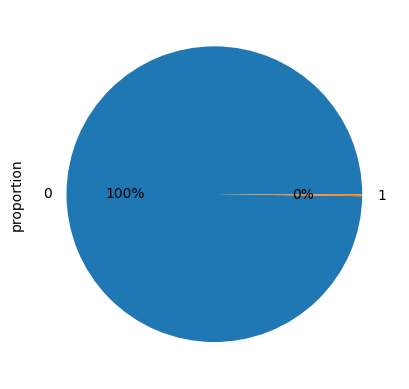

In [ ]:
proporcion_target(data['Class'])

**Nota técnica**

Observamos un desbalance en las clases. Procederemos a crear un modelo base como punto de partida para el análisis y la optimización.  

In [ ]:
# Establecemos semilla para replicabilidad.
semilla = 23432

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=semilla, stratify=target)

In [ ]:
print(f'df train: {features_train.shape[0]/features.shape[0]:0.1%}')
print(f'df test:  {features_test.shape[0]/features.shape[0]:0.1%}')

df train: 80.0%
df test:  20.0%


In [ ]:
def metricas_modelo(_model, _features_train, _target_train, _features_valid, _target_valid):
    """
    Función para evaluar los modelos.
    """
    model = _model
    model.fit(_features_train, _target_train)
    predicted_valid = model.predict(_features_valid)

    print(classification_report(_target_valid, predicted_valid))
    print('F1 Score:',f1_score(_target_valid, predicted_valid))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    sns.heatmap(confusion_matrix(_target_valid, predicted_valid), annot=True, fmt='g', cmap='Blues', ax=ax1)
    ax1.set_ylabel('Predicciones')
    ax1.set_xlabel('Valores reales')
    ax1.set_title("Matriz de confusión")

    probabilities_valid = _model.predict_proba(_features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    auc_roc = roc_auc_score(_target_valid, probabilities_one_valid)
    print('AUC-ROC:',auc_roc)

    fpr, tpr, thresholds = roc_curve(_target_valid, probabilities_one_valid)

    ax2.plot(fpr, tpr)

    ax2.plot([0, 1], [0, 1], linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.0])
    ax2.set_xlabel("Tasa de falsos positivos")
    ax2.set_ylabel("Tasa de verdaderos positivos")
    ax2.set_title("Curva ROC")

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def metricas_modelo_con_validacion_cruzada(_model, _features_train, _target_train):
    """
    Función para evaluar los modelos con validación cruzada.
    """

    predicted_valid = cross_val_predict(_model, _features_train, _target_train, cv=5)  # cv=5 para 5 folds

    print(classification_report(_target_train, predicted_valid))
    print('F1 Score:', f1_score(_target_train, predicted_valid))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    sns.heatmap(confusion_matrix(_target_train, predicted_valid), annot=True, fmt='g', cmap='Blues', ax=ax1)
    ax1.set_ylabel('Predicciones')
    ax1.set_xlabel('Valores reales')
    ax1.set_title("Matriz de confusión")

    probabilities_valid = cross_val_predict(_model, _features_train, _target_train, cv=5, method='predict_proba')
    probabilities_one_valid = probabilities_valid[:, 1]

    auc_roc = roc_auc_score(_target_train, probabilities_one_valid)
    print('AUC-ROC:', auc_roc)

    fpr, tpr, thresholds = roc_curve(_target_train, probabilities_one_valid)

    ax2.plot(fpr, tpr)

    ax2.plot([0, 1], [0, 1], linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.0])
    ax2.set_xlabel("Tasa de falsos positivos")
    ax2.set_ylabel("Tasa de verdaderos positivos")
    ax2.set_title("Curva ROC")

    plt.show()

#### <a id='toc1_3_1_1_'></a>[Modelo base sin balanceo de clases](#toc0_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43732
           1       0.17      0.01      0.02        94

    accuracy                           1.00     43826
   macro avg       0.58      0.51      0.51     43826
weighted avg       1.00      1.00      1.00     43826

F1 Score: 0.02
AUC-ROC: 0.7992535773988959


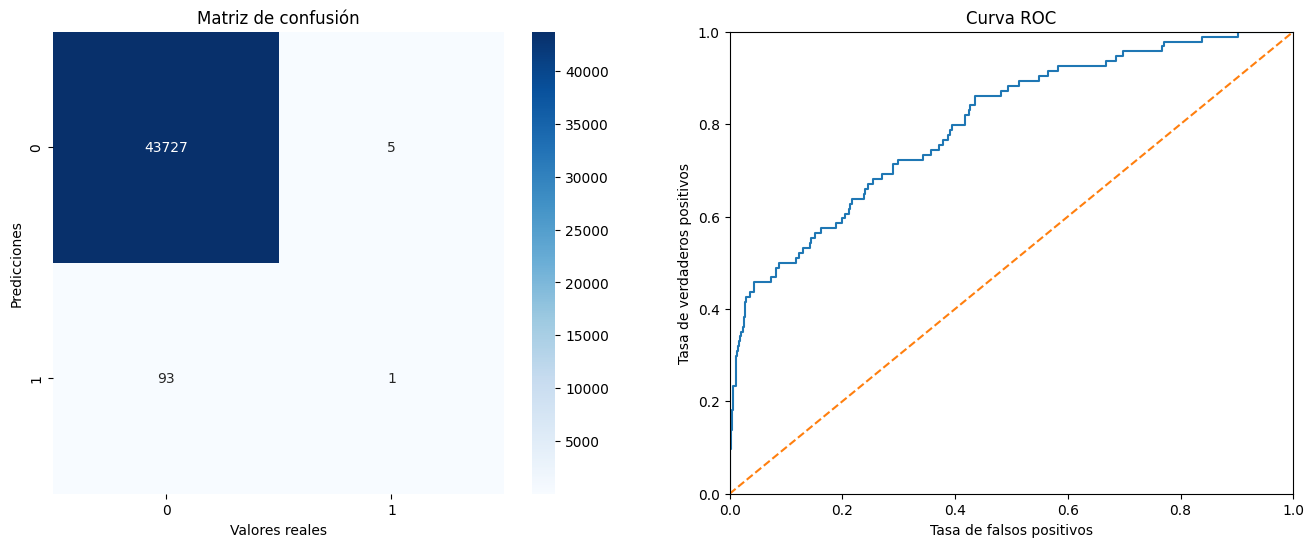

In [ ]:
metricas_modelo(LogisticRegression(random_state=semilla, solver='liblinear'), features_train, target_train, features_test, target_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174928
           1       0.12      0.01      0.02       375

    accuracy                           1.00    175303
   macro avg       0.56      0.50      0.51    175303
weighted avg       1.00      1.00      1.00    175303

F1 Score: 0.015037593984962405
AUC-ROC: 0.7874108509405775


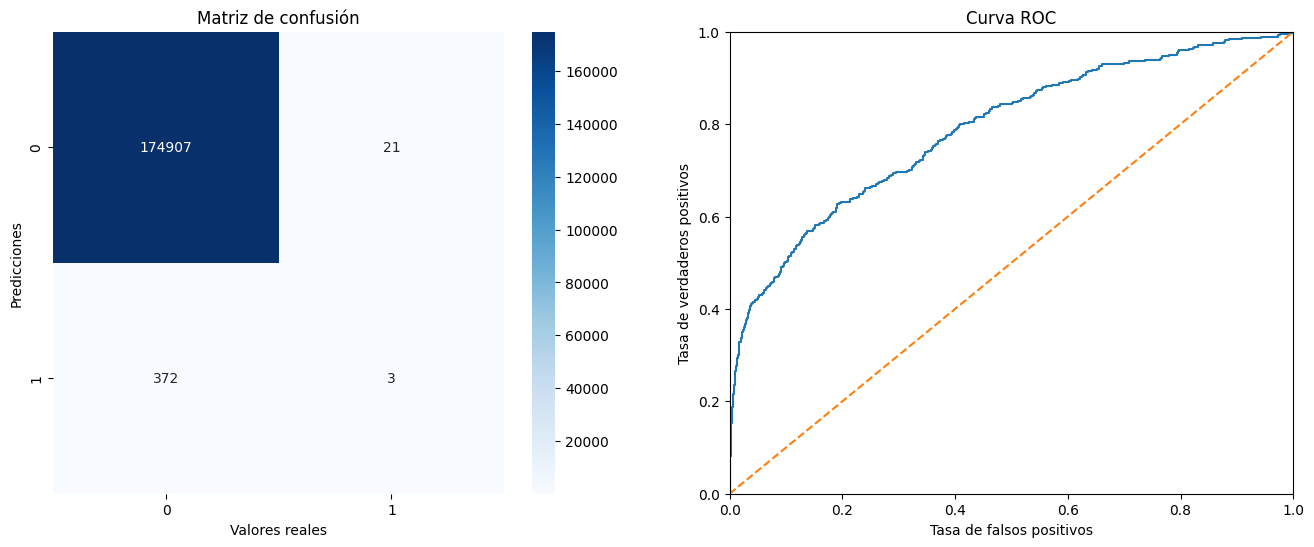

In [ ]:
metricas_modelo_con_validacion_cruzada(LogisticRegression(random_state=semilla, solver='liblinear'), features_train, target_train)

**Nota técnica**

Nuestro modelo base, sin considerar la distinción de clases ni la selección o ingeniería de características, no difiere significativamente de un modelo que asigna la etiqueta 0 a casi todos los clientes. Es importante resaltar que, aunque presenta una precisión (accuracy) casi perfecta, esto se debe al fuerte desbalance entre las clases, lo cual se refleja en un valor de F1 cercano a 0. Por otro lado, al evaluar el modelo mediante validación cruzada, observamos una ligera mejora en las métricas, aunque estas siguen siendo insatisfactorias.

#### <a id='toc1_3_1_2_'></a>[Con balanceo de clases](#toc0_)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90     43732
           1       0.01      0.61      0.01        94

    accuracy                           0.81     43826
   macro avg       0.50      0.71      0.45     43826
weighted avg       1.00      0.81      0.89     43826

F1 Score: 0.013564969062351261
AUC-ROC: 0.804702627804558


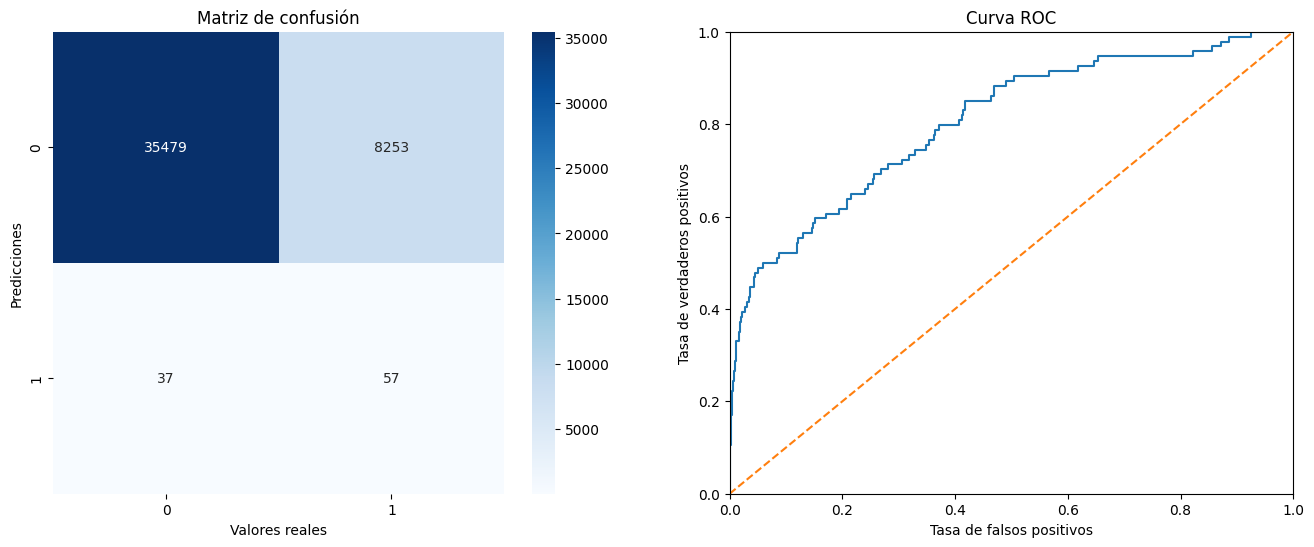

In [ ]:
metricas_modelo(LogisticRegression(class_weight='balanced', random_state=semilla, solver='liblinear'), features_train, target_train, features_test, target_test)

**Nota técnica**

Al utilizar el parámetro para balancear las clases en nuestro modelo, obtenemos un AUC-ROC de 0.79, lo que indica un rendimiento general bueno. Sin embargo, al observar el valor de F1 de 0.013, notamos que, aunque no es cero, sigue siendo extremadamente bajo, lo que refleja un rendimiento muy deficiente en la clasificación de nuestra clase positiva.

### <a id='toc1_3_2_'></a>[Análisis de caracteristicas](#toc0_)

#### <a id='toc1_3_2_1_'></a>[Distribuciones](#toc0_)

Examinemos la distribución de nuestras variables.

In [ ]:
features.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,...,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,-0.039758,...,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803
std,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,0.821889,...,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017
min,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,-22.092656,...,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000
25%,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,-0.499563,...,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000
50%,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,-0.106034,...,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000
75%,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,0.403967,...,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000
max,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,15.878405,...,15.407839,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000


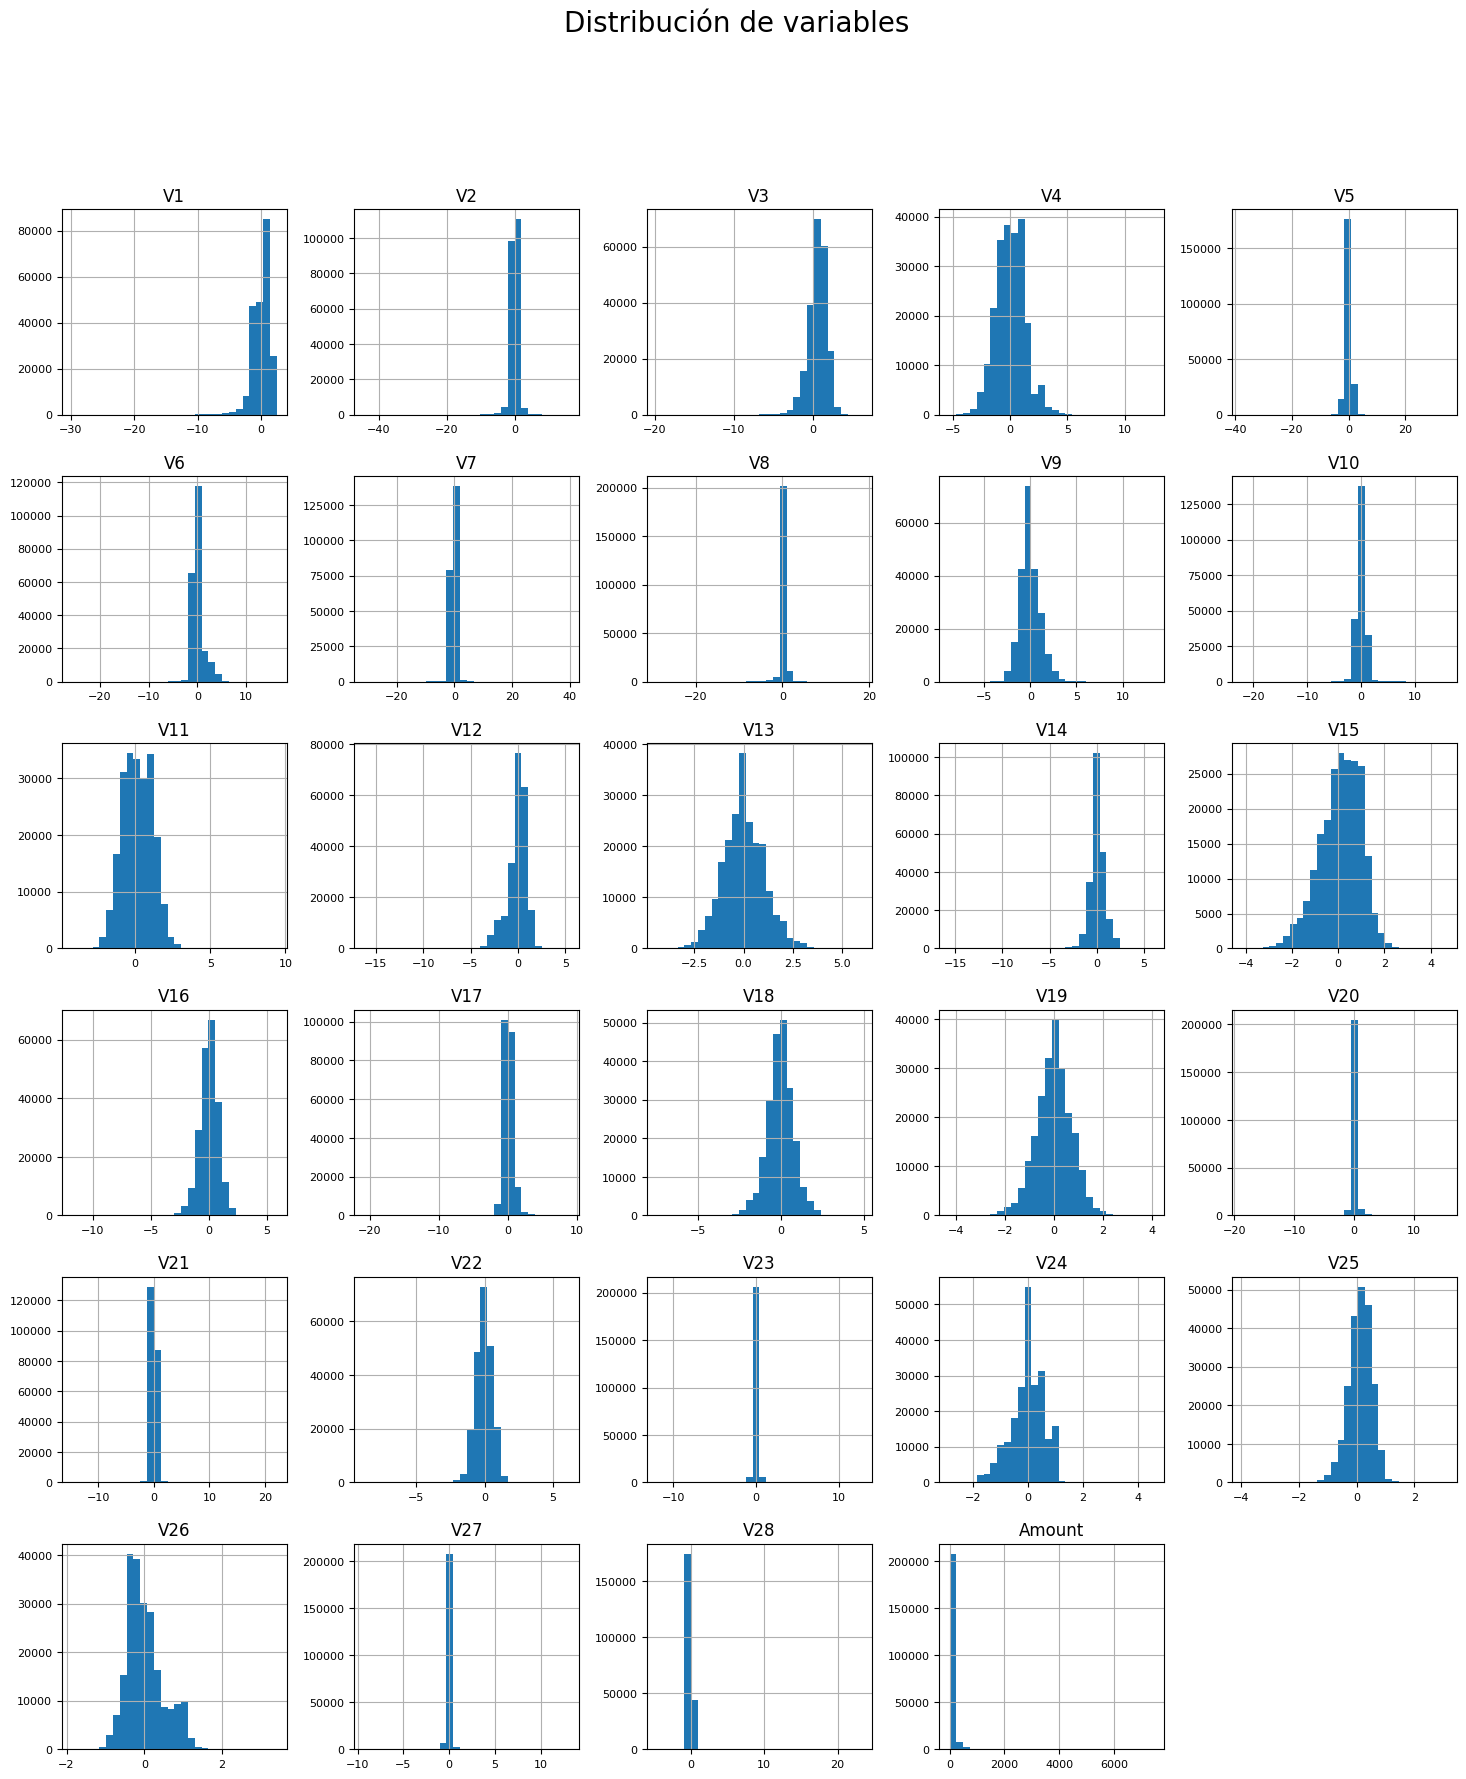

In [ ]:
features.hist(figsize=(18, 20), bins=30, xlabelsize=8, ylabelsize=8)
plt.suptitle("Distribución de variables", fontsize=20)
plt.show()

**Nota técnica**

Al observar las distribuciones de las variables, notamos que, aunque muchas presentan una distribución aproximadamente normal, en otras se evidencia un sesgo, lo que sugiere la presencia de valores atípicos. Se recomienda, en general, un tratamiento estadístico de los outliers como una posible área de mejora. Sin embargo, debido a limitaciones de tiempo, decidimos no abordar este ajuste por el momento y continuar con el análisis sin dicha modificación

<ipython-input-771-824784fda7b9>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[idx].boxplot(data_group, labels=target.unique())
<ipython-input-771-824784fda7b9>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[idx].boxplot(data_group, labels=target.unique())
<ipython-input-771-824784fda7b9>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[idx].boxplot(data_group, labels=target.unique())
<ipython-input-771-824784fda7b9>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[idx].boxplot(

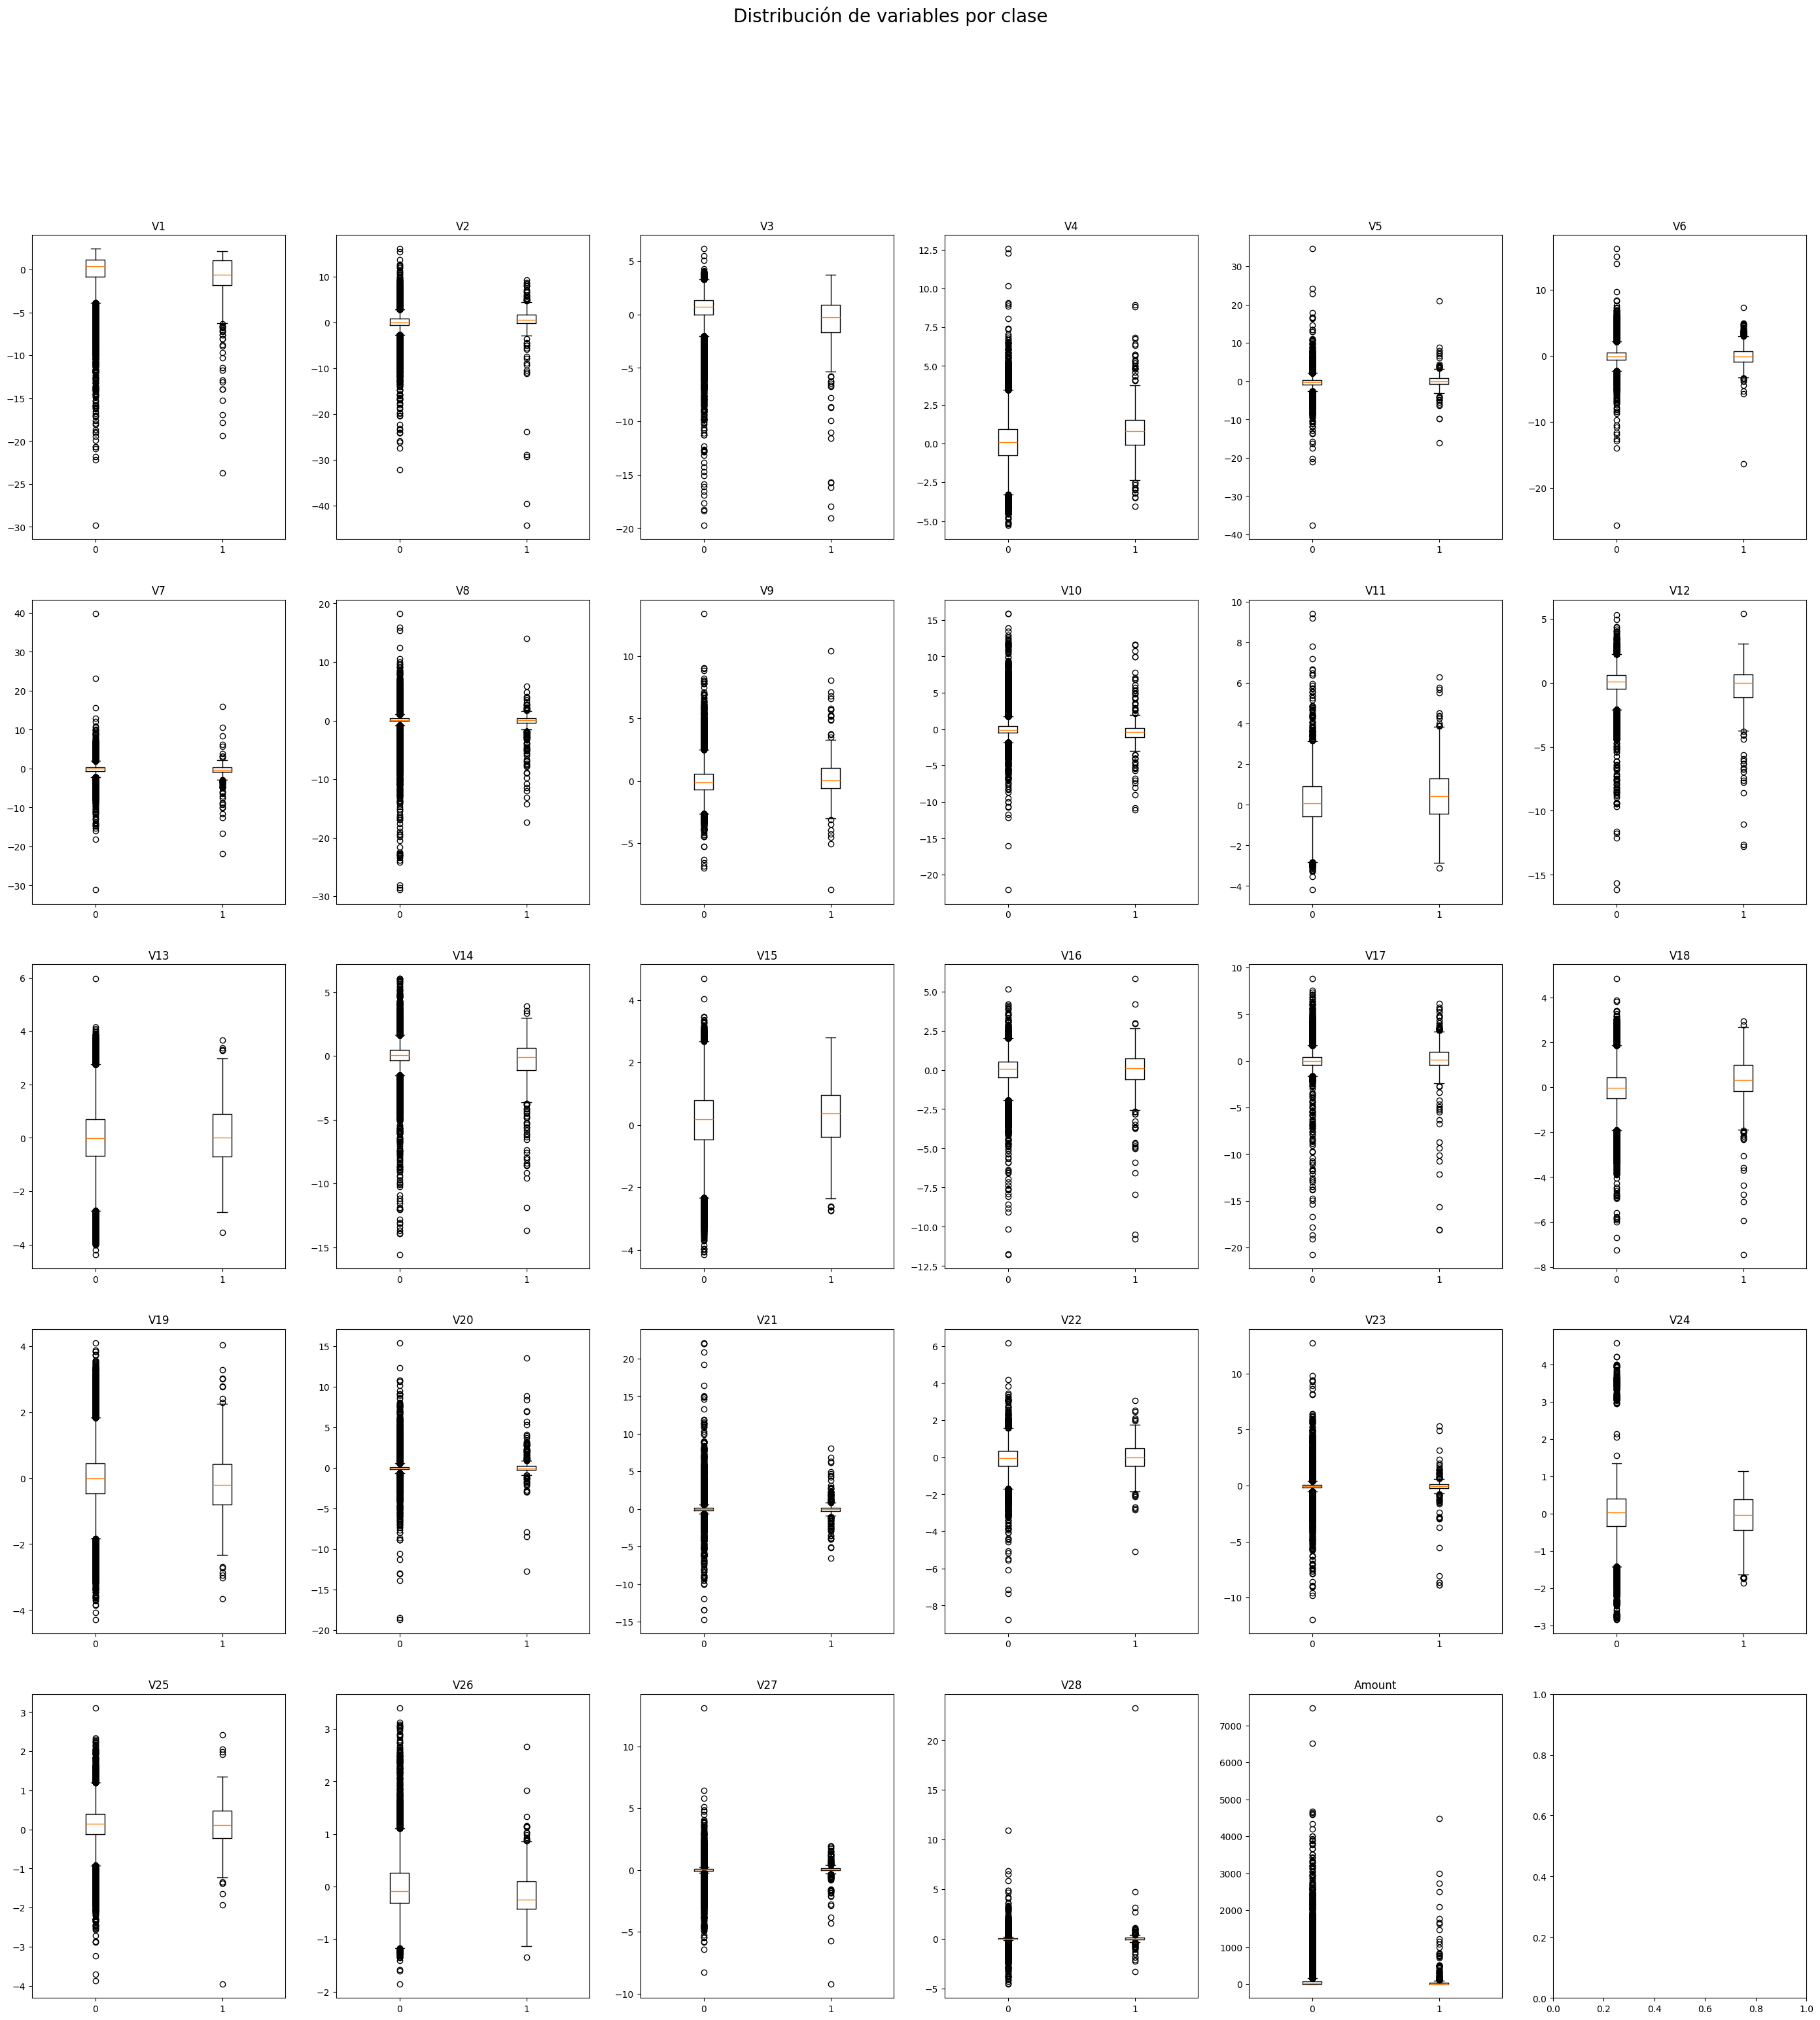

In [ ]:
fig, ax = plt.subplots(5,6, figsize=(35,35))
ax = ax.ravel()

for idx, feature in enumerate(features):
    data_group = [group[feature] for _, group in features.groupby(target)]
    ax[idx].boxplot(data_group, labels=target.unique())
    ax[idx].set_title(f"{feature}")

plt.suptitle("Distribución de variables por clase", fontsize=20)
plt.show()

#### <a id='toc1_3_2_2_'></a>[Correlación de variables](#toc0_)

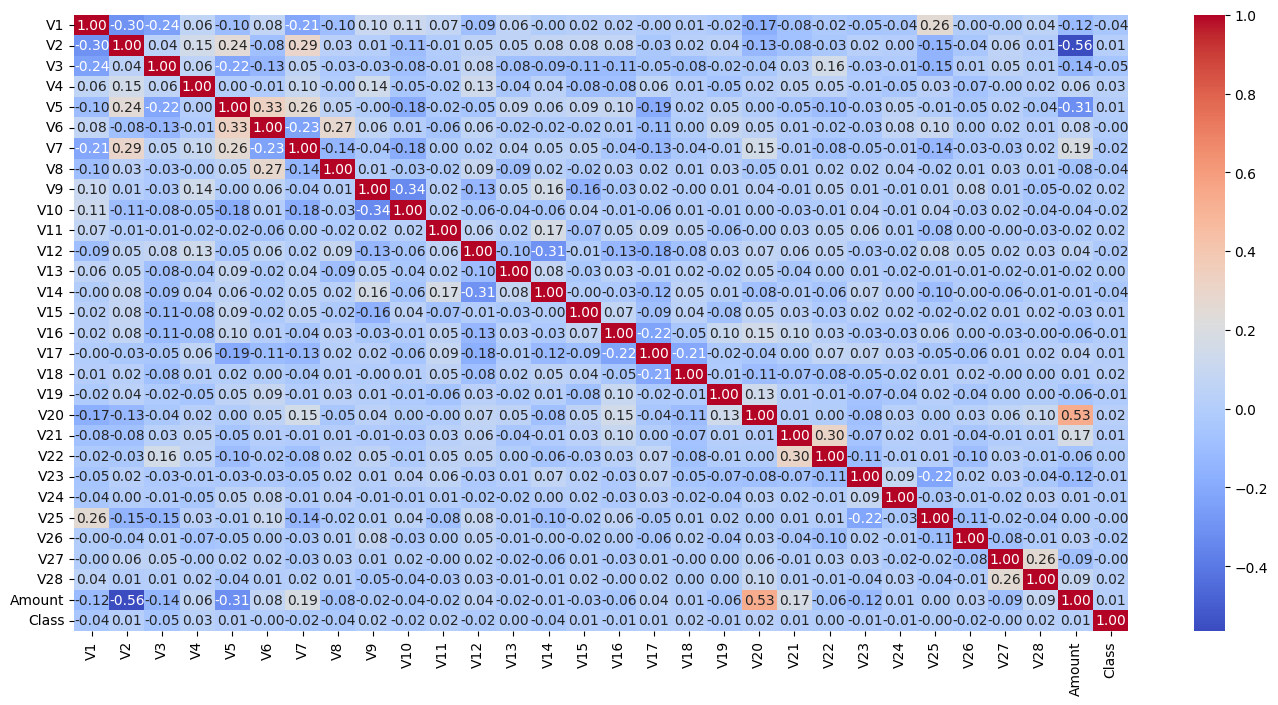

In [ ]:
plt.figure(figsize=(17, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

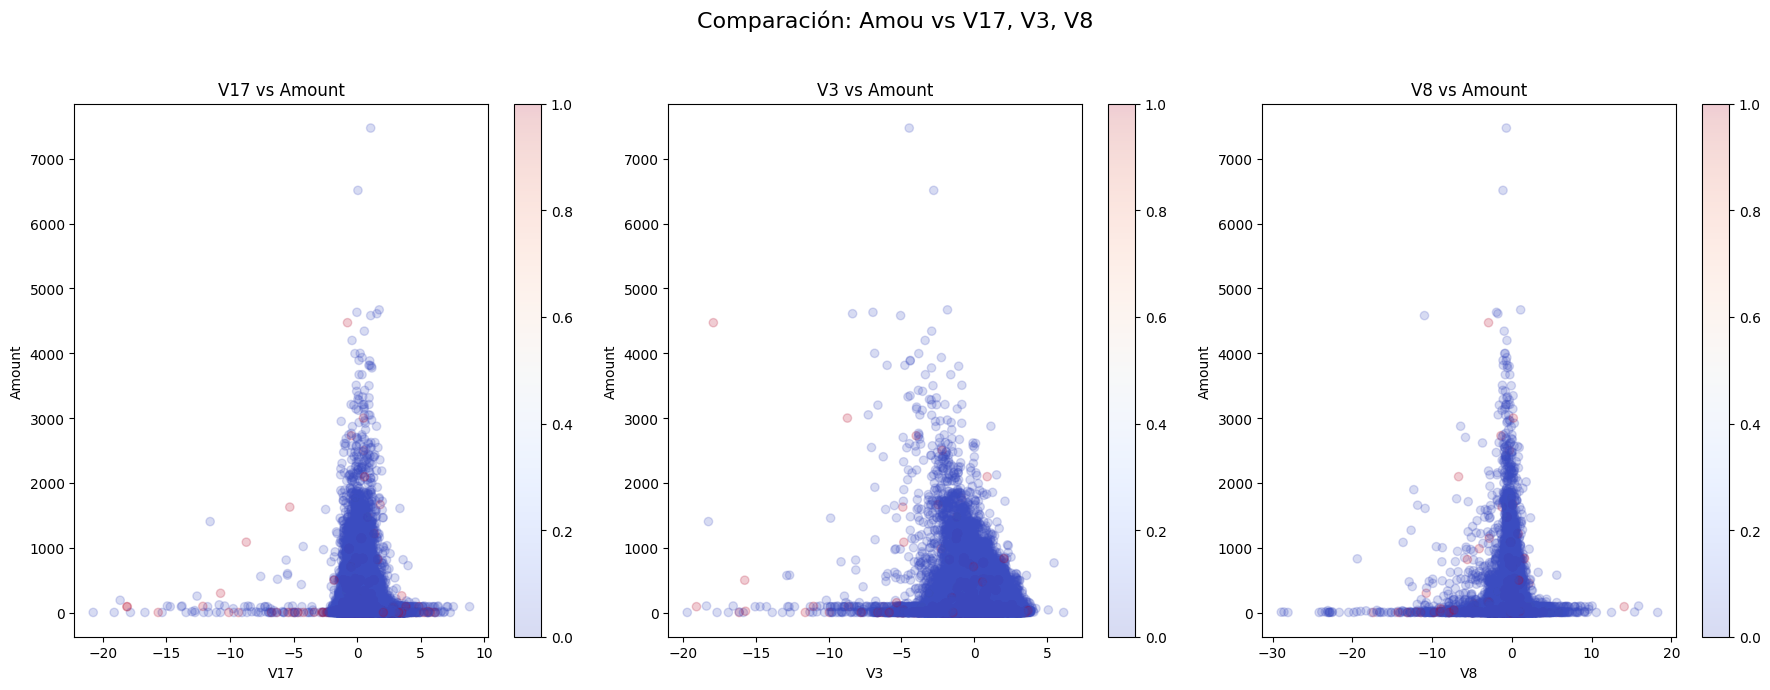

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 7))

scatter1 = ax[0].scatter(features["V17"], features["Amount"], cmap='coolwarm', c=target, alpha=0.2)
ax[0].set_title("V17 vs Amount")
ax[0].set_xlabel("V17")
ax[0].set_ylabel("Amount")
fig.colorbar(scatter1, ax=ax[0])

scatter2 = ax[1].scatter(features["V3"], features["Amount"], cmap='coolwarm', c=target, alpha=0.2)
ax[1].set_title("V3 vs Amount")
ax[1].set_xlabel("V3")
ax[1].set_ylabel("Amount")
fig.colorbar(scatter2, ax=ax[1])

scatter2 = ax[2].scatter(features["V8"], features["Amount"], cmap='coolwarm', c=target, alpha=0.2)
ax[2].set_title("V8 vs Amount")
ax[2].set_xlabel("V8")
ax[2].set_ylabel("Amount")
fig.colorbar(scatter2, ax=ax[2])

fig.suptitle("Comparación: Amou vs V17, V3, V8", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Nota técnica**

Observamos que varias variables tienen una correlación moderada con la variable Amount. Aunque existe cierta relación, esta interacción no es lo suficientemente significativa como para generar redundancias que puedan afectar negativamente nuestro modelo. En el análisis exploratorio de los datos, hemos identificado algunas variables con valores atípicos y una correlación moderada a baja entre ellas. Dado que no se observa una correlación alta que sugiera redundancia, y considerando los modelos que utilizaremos, se ha decidido mantener las características tal como están.

## <a id='toc1_4_'></a>[Balanceo de clases](#toc0_)

Debido al marcado desbalance entre nuestras clases, aplicaremos técnicas para mejorar el rendimiento de nuestros modelos. En particular, realizaremos un submuestreo de la clase 0 con el fin de equilibrar la distribución de las clases y aumentar la información disponible sobre la clase minoritaria.

In [ ]:
def submuestro(_features, _target, n):
    """
    Realiza un submuestreo de las class 0.
    """
    features_zeros = _features[_target == 0]
    features_ones = _features[_target == 1]
    target_zeros = _target[_target == 0]
    target_ones = _target[_target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(n=n, random_state=semilla)]
        + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(n=n, random_state=semilla)]
        + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=semilla)

    return features_downsampled, target_downsampled

In [ ]:
submuestro_tamano = 4*len(target[target==1])
features_sampled, target_sampled = submuestro(features, target, submuestro_tamano)
target_sampled.value_counts()

,count
Class,
0,1876
1,469


In [ ]:
print("Tabla original\n", target.value_counts() / target.shape[0])
print("\n")
print("Tabla final\n", target_sampled.value_counts() / target_sampled.shape[0])

Tabla original
 Class
0    0.99786
1    0.00214
Name: count, dtype: float64


Tabla final
 Class
0    0.8
1    0.2
Name: count, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_sampled, target_sampled, test_size=0.2, random_state=semilla, stratify=target_sampled)

## <a id='toc1_5_'></a>[Guardar tablas](#toc0_)

In [ ]:
tabla_train = X_train.copy()
tabla_train['target'] = y_train
tabla_train.to_csv('/content/Tabla_train.csv', index=False)

In [ ]:
tabla_test = X_test.copy()
tabla_test['target'] = y_test
tabla_test.to_csv('/content/Tabla_test.csv', index=False)

## <a id='toc1_5_'></a>[Modelado sin ingeniería de características](#toc0_)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       375
           1       0.73      0.49      0.59        94

    accuracy                           0.86       469
   macro avg       0.81      0.72      0.75       469
weighted avg       0.85      0.86      0.85       469

F1 Score: 0.5859872611464968
AUC-ROC: 0.8201276595744681


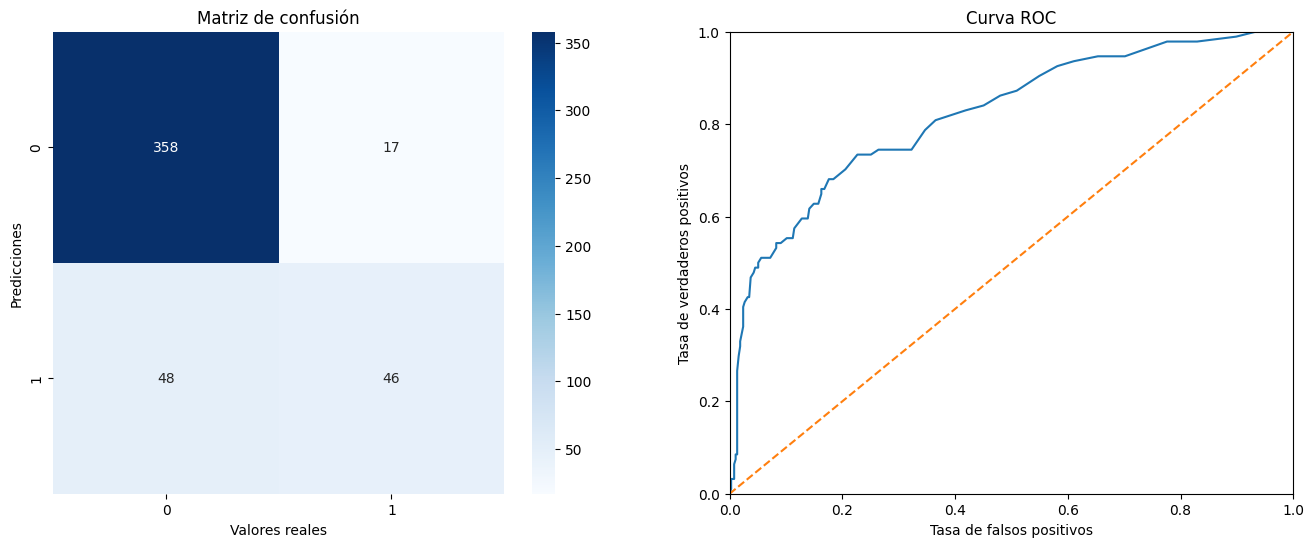

In [ ]:
metricas_modelo(RandomForestClassifier(random_state=semilla), X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       246
           1       0.68      0.31      0.43        61

    accuracy                           0.83       307
   macro avg       0.76      0.64      0.66       307
weighted avg       0.82      0.83      0.81       307

F1 Score: 0.42696629213483145
AUC-ROC: 0.8051446088231373


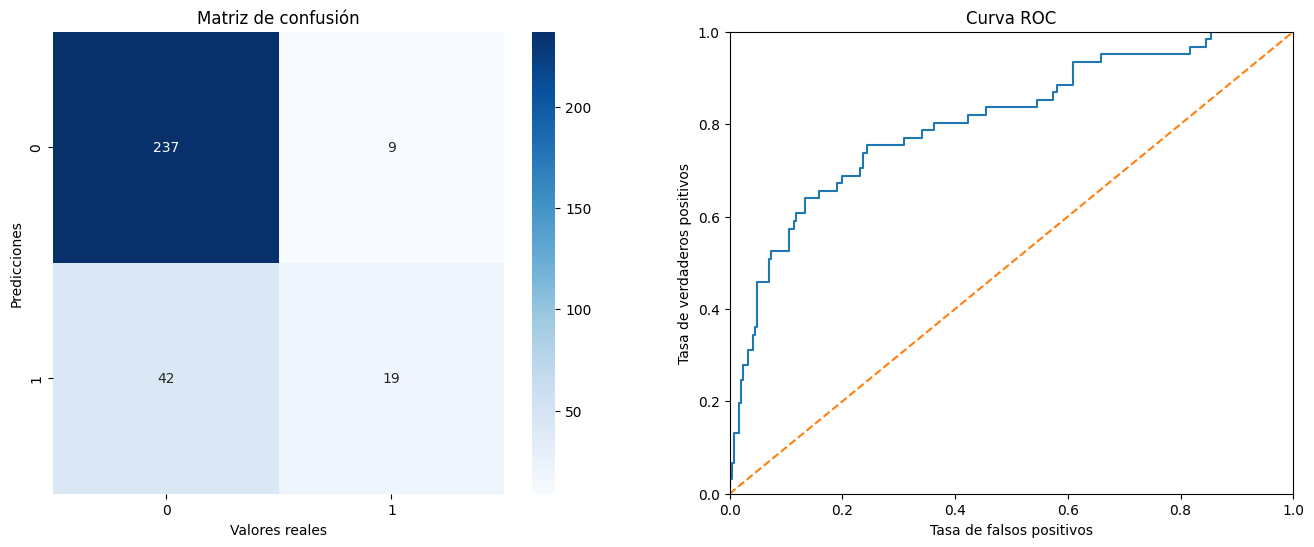

In [ ]:
metricas_modelo(CatBoostClassifier(silent=True, random_state=semilla), X_train, y_train, X_test, y_test)

**Nota técnica**
Aunque las métricas han mejorado sustancialmente, el modelo aún presenta dificultades con la métrica F1 score, la cual evalúa el equilibrio entre precisión y recall. Antes de seguir probando con más modelos, realizaremos un análisis de características para eliminar aquellas variables que no estén contribuyendo sustancialmente al rendimiento del modelo

**Guardado estratégico**

In [ ]:
model = CatBoostClassifier(silent=True, random_state=semilla)

model.fit(X_train, y_train)

In [ ]:
# Obtener las predicciones
test_predictions = model.predict_proba(data_test.drop(columns='id'))[:, 1]

results_predictions = pd.DataFrame(columns=['id', 'Class'])
results_predictions['id'] = data_test['id']
results_predictions['Class'] = test_predictions

In [ ]:
print(results_predictions)

            id     Class
0       219129  0.058815
1       219130  0.073191
2       219131  0.027159
3       219132  0.234001
4       219133  0.060978
...        ...       ...
146082  365211  0.065695
146083  365212  0.158578
146084  365213  0.141348
146085  365214  0.035265
146086  365215  0.070491

[146087 rows x 2 columns]


In [ ]:
# Convertir las probabilidades a predicciones binarias
binary_predictions = (test_predictions >= 0.5).astype(int)

# Crear un DataFrame con los resultados
results_predictions = pd.DataFrame(columns=['id', 'Class'])
results_predictions['id'] = data_test['id']
results_predictions['Class'] = binary_predictions

In [ ]:
# Mostrar las primeras filas del DataFrame
print(results_predictions.head())

       id  Class
0  219129      0
1  219130      0
2  219131      0
3  219132      0
4  219133      0


In [ ]:
results_predictions.to_csv('/content/test_con_predicciones.csv', index=False)

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

y_pred_prob = model.predict_proba(X_test)[:, 1]

umbral = 0.3
y_pred = (y_pred_prob > umbral).astype(int)

auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

AUC: 0.8552056737588652
Precisión: 0.6352941176470588
Recall: 0.574468085106383
F1-score: 0.6033519553072626


**Nota técnica**
El ajuste para el umbral en la presicisión ayuda a mejorar la metrica F1-score.

## <a id='toc1_4_'></a>[Importancia de caracteristicas](#toc0_)

   Feature  Importance
2       V3    0.059650
16     V17    0.053930
7       V8    0.050017
20     V21    0.048489
9      V10    0.046341
1       V2    0.045898
3       V4    0.043438
13     V14    0.043429
25     V26    0.037241
6       V7    0.037192
5       V6    0.036031
28  Amount    0.035763
17     V18    0.033246
10     V11    0.029879
8       V9    0.029805
27     V28    0.029641
24     V25    0.028755
0       V1    0.028241
21     V22    0.027696
11     V12    0.027586
12     V13    0.027537
19     V20    0.027079
18     V19    0.026465
15     V16    0.026092
22     V23    0.025408
26     V27    0.025054
4       V5    0.024829
14     V15    0.023881
23     V24    0.021385


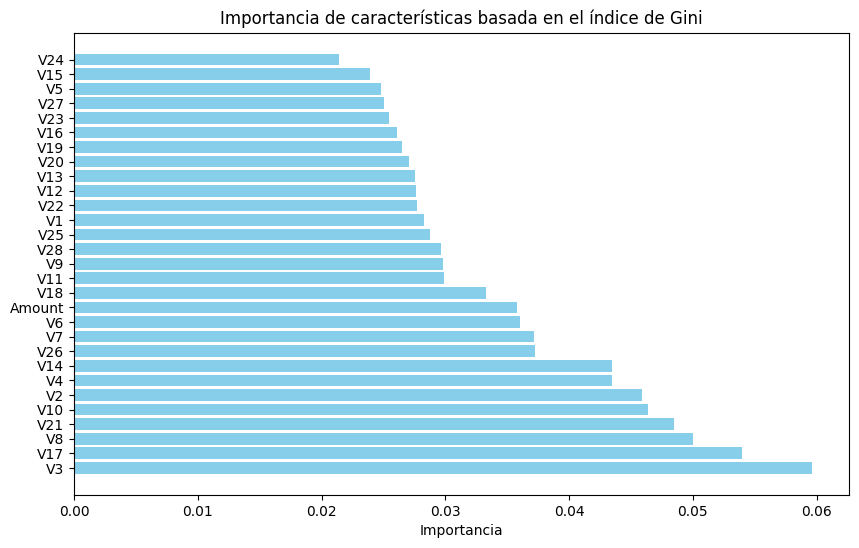

In [ ]:
# Segun el índice de Gini
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de características basada en el índice de Gini')
plt.show()

             PC1       PC2
V1     -0.179361  0.452864
V2      0.535473 -0.129911
V3      0.041923 -0.284847
V4      0.023476 -0.129903
V5      0.384651  0.060117
V6     -0.031691  0.223504
V7      0.217092 -0.427436
V8      0.055832  0.097511
V9      0.049603  0.034891
V10    -0.161229  0.209771
V11     0.014117  0.023488
V12    -0.073103 -0.190207
V13     0.078234  0.041828
V14     0.173007  0.082490
V15     0.070853  0.013582
V16     0.047954  0.056521
V17    -0.120343 -0.014637
V18     0.064428  0.128774
V19     0.018909 -0.008472
V20    -0.244442 -0.343105
V21    -0.153924 -0.155456
V22    -0.100430 -0.096183
V23     0.124738  0.044751
V24     0.018965 -0.006258
V25    -0.190408  0.259990
V26    -0.019286 -0.017145
V27     0.031760 -0.035104
V28    -0.059365 -0.103712
Amount -0.482297 -0.300725


<Figure size 1000x600 with 0 Axes>

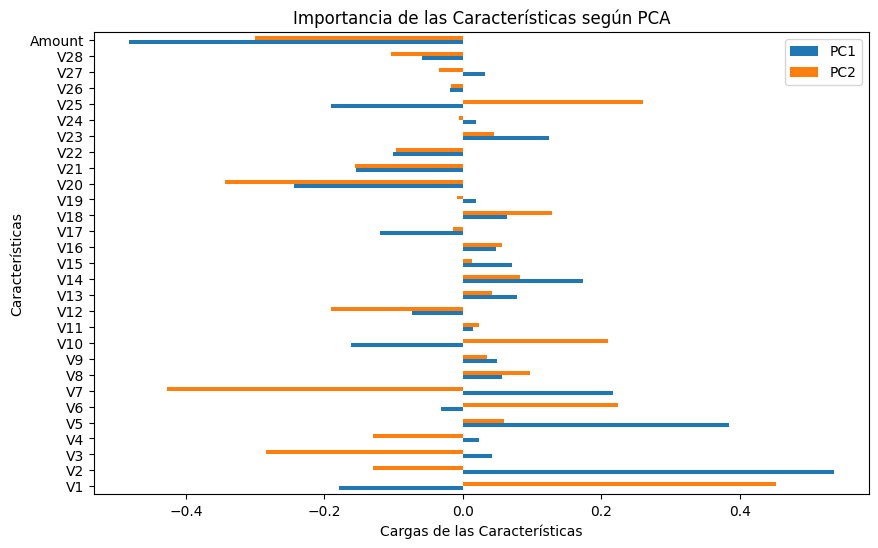

In [ ]:
#Segun modelo PCA
from sklearn.decomposition import PCA

X = data.drop(columns=['Class'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)

component_loadings = pca.components_

loadings_df = pd.DataFrame(component_loadings.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

print(loadings_df)

plt.figure(figsize=(10, 6))
loadings_df.plot(kind='barh', figsize=(10, 6))
plt.title('Importancia de las Características según PCA')
plt.xlabel('Cargas de las Características')
plt.ylabel('Características')
plt.show()


In [ ]:
# Eliminar caracteristicas menos relevantes
#caracteristicas_a_eliminar = ['V23', 'V27', 'V24', 'V13', 'V28']
caracteristicas_a_eliminar = ['V24']

X_train = X_train.drop(columns=caracteristicas_a_eliminar)
X_test = X_test.drop(columns=caracteristicas_a_eliminar)

target
0    1501
1     375
Name: count, dtype: int64


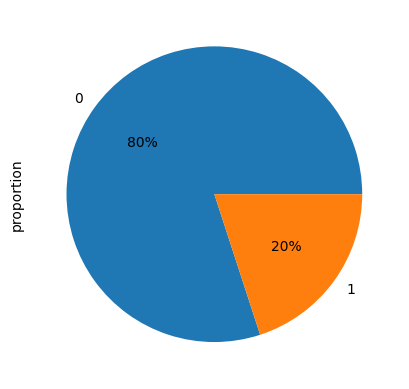

In [ ]:
proporcion_target(tabla_train['target'])

## <a id='toc1_5_'></a>[Modelado](#toc0_)

In [ ]:
Resultados = []

### <a id='toc1_5_1_'></a>[LGBMClassifier](#toc0_)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       375
           1       0.67      0.43      0.52        94

    accuracy                           0.84       469
   macro avg       0.77      0.69      0.71       469
weighted avg       0.83      0.84      0.83       469

F1 Score: 0.5194805194805194
AUC-ROC: 0.840113475177305


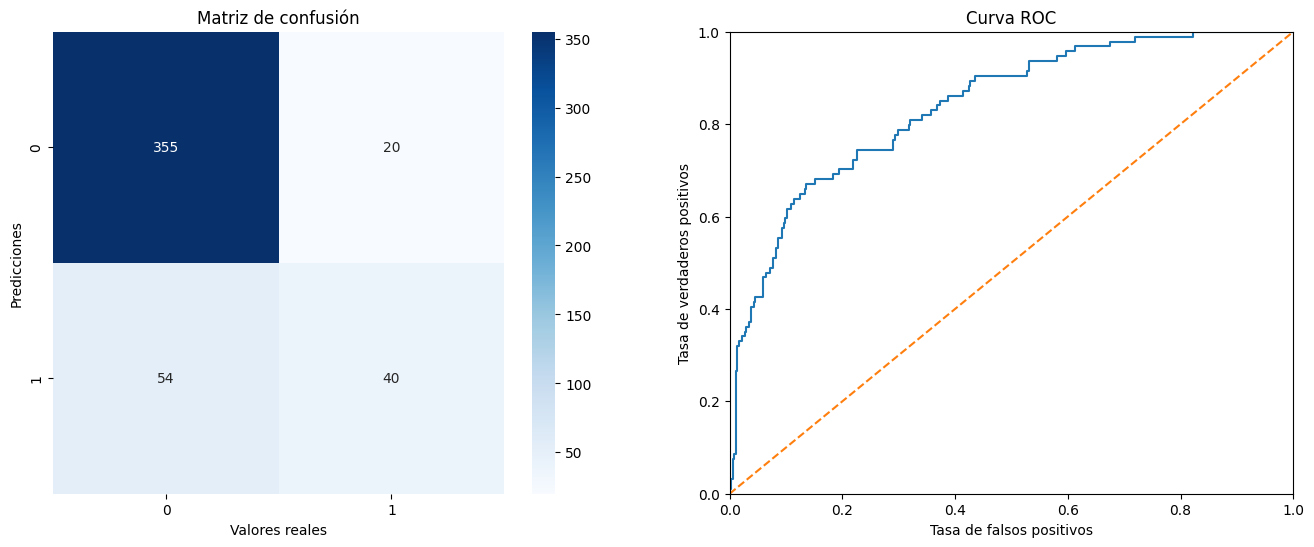

In [ ]:
metricas_modelo(LGBMClassifier(objective='binary', random_state=semilla, verbose=-1), X_train, y_train, X_test, y_test)

In [ ]:
Resultados.append({
    "model": "LGBMClassifier",
    "AUC-ROC": 0.84,
    "F1 Score": 0.51
})

### <a id='toc1_5_2_'></a>[Random Forest Classifier](#toc0_)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       375
           1       0.71      0.48      0.57        94

    accuracy                           0.86       469
   macro avg       0.80      0.72      0.74       469
weighted avg       0.85      0.86      0.85       469

F1 Score: 0.5732484076433121
AUC-ROC: 0.824950354609929


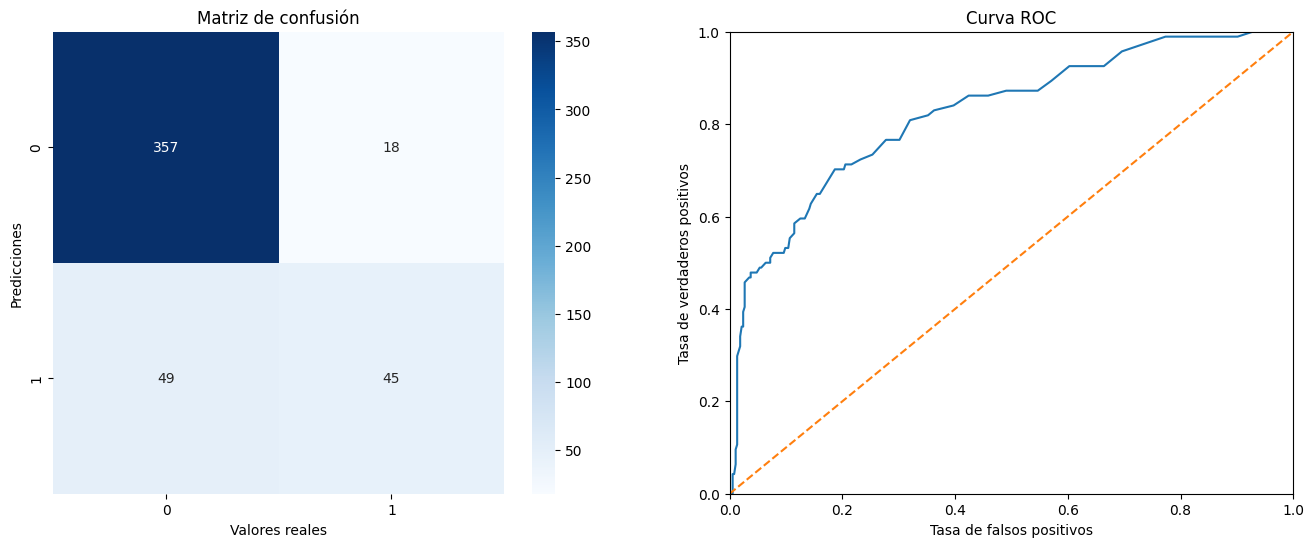

In [ ]:
metricas_modelo(RandomForestClassifier(random_state=semilla), X_train, y_train, X_test, y_test)

In [ ]:
Resultados.append({
    "model": "RandomForestClassifier",
    "AUC-ROC": 0.82,
    "F1 Score": 0.57
})

### <a id='toc1_5_3_'></a>[CatBoostClassifier](#toc0_)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       375
           1       0.75      0.43      0.54        94

    accuracy                           0.86       469
   macro avg       0.81      0.70      0.73       469
weighted avg       0.85      0.86      0.84       469

F1 Score: 0.54421768707483
AUC-ROC: 0.8483404255319149


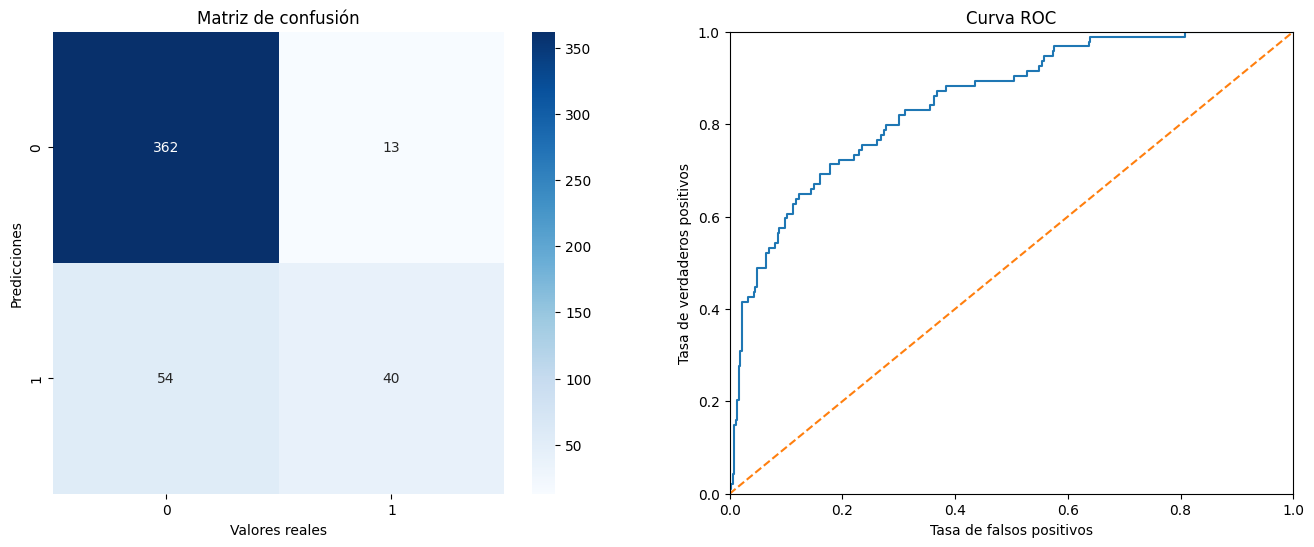

In [ ]:
metricas_modelo(CatBoostClassifier(silent=True, random_state=semilla), X_train, y_train, X_test, y_test)

In [ ]:
Resultados.append({
    "model": "CatBoostClassifier",
    "AUC-ROC": 0.84,
    "F1 Score": 0.54
})

In [ ]:
#metricas_modelo_con_validacion_cruzada(CatBoostClassifier(silent=True, random_state=semilla), X_train, y_train)

### <a id='toc1_5_3_'></a>[GradientBoostingClassifier](#toc0_)


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       375
           1       0.68      0.46      0.55        94

    accuracy                           0.85       469
   macro avg       0.78      0.70      0.73       469
weighted avg       0.84      0.85      0.84       469

F1 Score: 0.5477707006369427
AUC-ROC: 0.8415602836879432


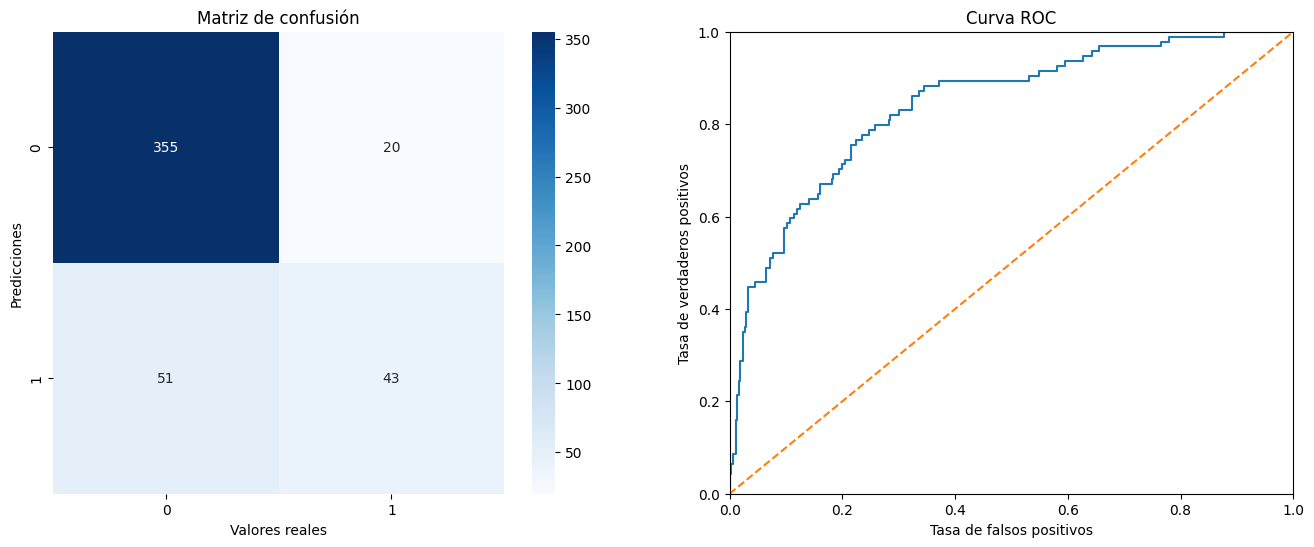

In [ ]:
metricas_modelo(GradientBoostingClassifier(random_state=semilla), X_train, y_train, X_test, y_test)

In [ ]:
Resultados.append({
    "model": "GradientBoosting",
    "AUC-ROC": 0.84,
    "F1 Score":  0.54
})

In [ ]:
pd.DataFrame(Resultados).sort_values('AUC-ROC', ascending=False)

,model,AUC-ROC,F1 Score
0,LGBMClassifier,0.84,0.51
2,CatBoostClassifier,0.84,0.54
3,GradientBoosting,0.84,0.54
1,RandomForestClassifier,0.82,0.57


### <a id='toc1_5_4_'></a>[Optimización de hiperparámetros](#toc0_)

**Nota técnica**

Con base a la evaluación de los cuatro modelos realizados anteriormente, seleccionaremos los dos modelos con mejores métricas, siendo estos el GradientBoostingClassifier y el CatBoostClassifier

In [ ]:
# Definición del modelo
model = GradientBoostingClassifier(random_state=semilla)

# Definir el grid de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 0.8],
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.8, 0.9, 1.0]
}

In [ ]:
# Búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   n_iter=20,
                                   cv=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   random_state=semilla)

In [ ]:
# Entrenamiento del modelo
search_result = random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(search_result.best_params_)

{'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 6, 'learning_rate': 0.05}


In [ ]:
mejores_parametros = search_result.best_params_

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       375
           1       0.64      0.45      0.53        94

    accuracy                           0.84       469
   macro avg       0.75      0.69      0.71       469
weighted avg       0.82      0.84      0.83       469

F1 Score: 0.525
AUC-ROC: 0.8349219858156028


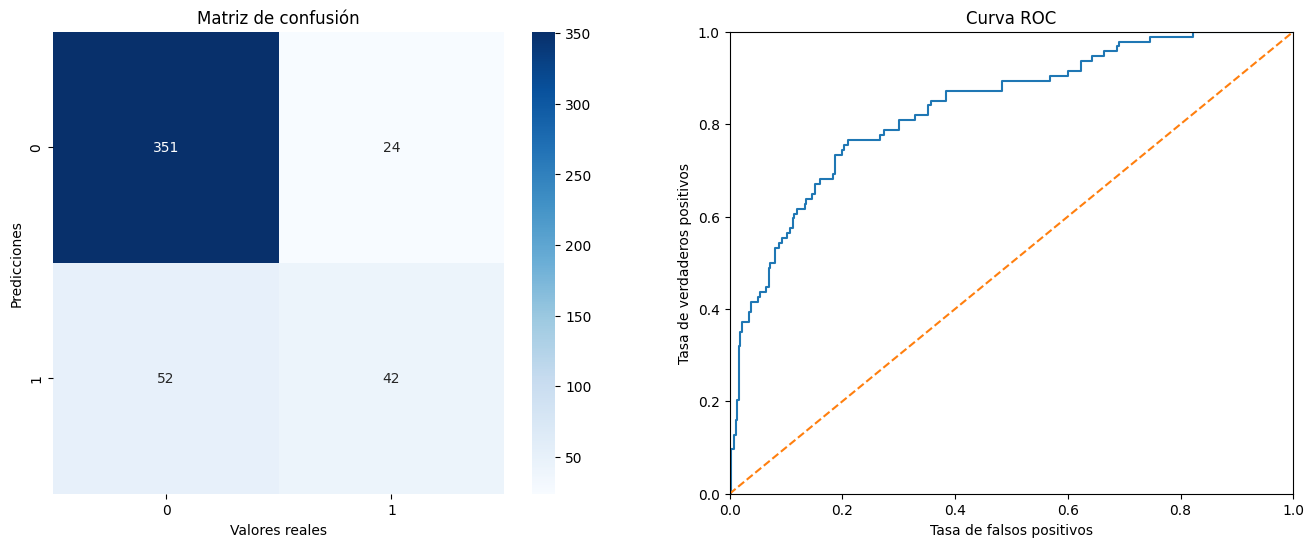

In [ ]:
metricas_modelo(GradientBoostingClassifier(**mejores_parametros, random_state=semilla), X_train, y_train, X_test, y_test)

In [ ]:
#metricas_modelo_con_validacion_cruzada(GradientBoostingClassifier(**mejores_parametros, random_state=semilla), X_train, y_train)

In [ ]:
model = CatBoostClassifier(silent=True)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 0.8],
    'depth': [2, 4, 6, 8, 10],
    'l2_leaf_reg': [0.01, 0.02, 0.1],
    'iterations': [100, 200, 300],
    'border_count': [32, 64, 128],
}


random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   n_iter=20,
                                   cv=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   random_state=semilla)
search_result = random_search.fit(X_train, y_train, verbose=False)

In [ ]:
search_result.best_params_

{'learning_rate': 0.01,
 'l2_leaf_reg': 0.1,
 'iterations': 300,
 'depth': 6,
 'border_count': 128}

In [ ]:
mejores_parametros = {
    'learning_rate': 0.01,
    'l2_leaf_reg': 0.1,
    'iterations': 300,
    'depth': 6,
    'border_count': 128
    }

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       375
           1       0.83      0.43      0.56        94

    accuracy                           0.87       469
   macro avg       0.85      0.70      0.74       469
weighted avg       0.86      0.87      0.85       469

F1 Score: 0.5633802816901409
AUC-ROC: 0.8483971631205675


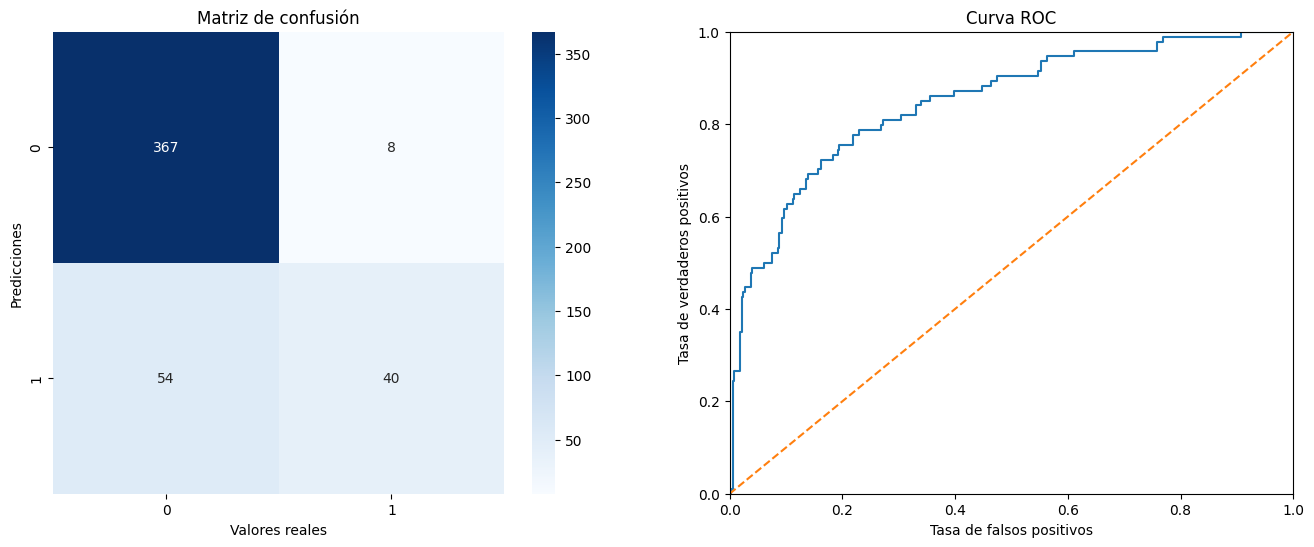

In [ ]:
metricas_modelo(CatBoostClassifier(**mejores_parametros, silent=True, random_state=semilla), X_train, y_train, X_test, y_test)

## <a id='toc1_6_'></a>[Ensamble de modelos](#toc0_)

In [ ]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

model1 = LGBMClassifier(objective='binary', random_state=semilla, verbose=-1)
model2 = RandomForestClassifier(random_state=semilla)
model3 = CatBoostClassifier(silent=True, random_state=semilla)
model4 = GradientBoostingClassifier(random_state=semilla)

ensemble_model_weighted = VotingClassifier(estimators=[
    ('lgbm', model1),
    ('rf', model2),
    ('catboost', model3),
    ('gb', model4)
], voting='soft', weights=[2, 1, 3, 1])

ensemble_model_weighted.fit(X_train, y_train)

y_pred = ensemble_model_weighted.predict(X_test)

y_pred_prob = ensemble_model_weighted.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"AUC: {roc_auc_score(y_test, y_pred_prob)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.8592750533049041
AUC: 0.8457872340425532
F1-score: 0.5714285714285714


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

## <a id='toc1_7_'></a>[Conclusión](#toc0_)

Después de llevar a cabo un análisis exploratorio de datos (EDA), logramos obtener una comprensión más detallada de nuestro conjunto de datos, el cual presenta un desequilibrio significativo entre las clases: un 99% de las instancias corresponden a la clase negativa, mientras que solo un 1% pertenecen a la clase positiva.

Al examinar la dispersión de las variables, identificamos ciertos patrones que sugieren relaciones moderadas entre algunas de ellas. Aunque no se detectaron correlaciones fuertes, no se descarta que una correlación conjunta pueda ofrecer información valiosa para el modelo. Además, encontramos la presencia de valores atípicos que podrían influir en el rendimiento de los modelos, lo que implica la necesidad de un tratamiento especial para estos datos. Sin embargo, al aplicar un criterio estadístico para eliminar los outliers, observamos que perdemos una gran parte de las etiquetas positivas. A través de métodos de importancia de características, como PCA y el valor de Gini, decidimos descartar la variable 'V24' debido a su baja relevancia.

Para comenzar con el modelado, utilizamos una regresión logística como modelo base, sin realizar ajustes de parámetros ni tratamiento previo de las variables. Esto nos proporcionó un punto de referencia para evaluar el rendimiento inicial en el conjunto de datos. Posteriormente, implementamos modelos más complejos como Random Forest, LGBM, CatBoost y Gradient Boosting, empleando un enfoque de submuestreo para equilibrar las clases, lo que resultó en una distribución de 80% de la clase negativa y 20% de la clase positiva (manteniendo intacta la clase positiva).

El mejor desempeño lo obtuvo el modelo CatBoost con balanceo y sin quitar alguna variable, que logró un rendimiento destacado con un AUC-ROC de 0.855, lo que demuestra su capacidad para diferenciar entre las clases. No obstante, al analizar la métrica F1, que alcanzó un valor de 0.58, notamos que la capacidad del modelo para identificar correctamente las instancias de la clase positiva es moderada, lo que constituye un área de mejora en futuras iteraciones. Cabe destacar que, al evaluar las métricas mediante validación cruzada, los resultados obtenidos fueron más conservadores, lo que nos da una mejor estimación del rendimiento del modelo en datos no vistos.

Finalmente, se presentó un modelo de ensamblaje tipo voting, que, aunque no superó los resultados de los modelos previos en las métricas AUC y F1-score, alcanzó una excelente métrica de precisión de 0.859.

## <a id='toc1_1_'></a>[Anexo: Enfoque 2: Modelo Neural Network](#toc0_)

In [ ]:
pip uninstall scipy

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scipy-1.13.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so
    /usr/local/lib/python3.11/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/scipy/*
Proceed (Y/n)? Y
  Successfully uninstalled scipy-1.13.1


In [ ]:
pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 38.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.4.33 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, but you have scipy 1.9.3 which is incompatible.
jax 0.4.33 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.9.3 which is incompatible.
scikit-image 0.25.0 requires scipy>=1.11.2, but you have scipy 1.9.3 which is 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
import sklearn.metrics as metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import scikitplot as skplt
new_style = {'grid': False}
plt.rc('axes', **new_style)
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')

In [ ]:
#Definir funciones
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def repre_matriz_confusion(matriz):
    df_matriz_confusion = pd.DataFrame(matriz,
                     ['True Normal','True Fraud'],
                     ['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sns.set(font_scale=1.4)
    plt.title(u'Matriz de confusión')
    _ = sns.heatmap(df_matriz_confusion, annot=True, annot_kws={"size": 16}, fmt='g')

def reporting_modelo(y_reales, y_clase):
    matriz_confusion = metrics.confusion_matrix(y_reales, y_clase)
    roc_auc = metrics.roc_auc_score(y_reales, y_clase)
    metrica_f1 = metrics.f1_score(y_reales, y_clase)
    print(u'La AUC de la ROC es de: {}'.format(round(roc_auc,2)))
    print(u'La F1 es de: {}'.format(round(metrica_f1,2)))
    print("\nAccuracy\t{}".format(round(metrics.accuracy_score(y_reales, y_clase),3)))
    print("Sensitividad\t{}".format(round(metrics.recall_score(y_reales, y_clase),3)))
    print(u"Precisión\t{}".format(round(metrics.precision_score(y_reales, y_clase),3)))
    repre_matriz_confusion(matriz_confusion)

def repres_doble_hist(y_prob_pos, y_prob_neg):

    fig = plt.figure(figsize=(20,10))
    ax = sns.distplot(y_prob_pos,norm_hist=True, bins=30, hist=False,
    label='', kde_kws={"color": "r", "lw": 5})
    ax2 = ax.twinx()
    sns.distplot(y_prob_neg,norm_hist=True ,ax=ax2, bins=30, hist=False,
    label='', kde_kws={"color": "g", "lw": 2})
    sns.set_style("whitegrid", {'axes.grid' : False})
    ax.figure.legend(['Clase fraudulenta', 'Clase no fraudulenta'])
    new_style = {'grid': False}
    plt.rc('axes', **new_style)
    plt.title('Representación de las probabilidades asignadas a ambas clases')
    plt.show()

In [ ]:
#Definir conjuntos de entrenamiento y prueba
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Nota técnica**

En este punto sabemos que los datos presentan un desbalanceo significativo en las clases, con una distribución de aproximadamente 99% a 1%.

## <a id='toc1_7_'></a>[Representación del PCA de las clases](#toc0_)

In [ ]:
df_plt=data[data['Class']==0].sample(4000)
df_plt_pos=data[data['Class']==1].sample(60)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['Class']
X_plt=df_plt.drop('Class',axis=1)

In [ ]:
pca2 = PCA(n_components=3)
X_PCA = pca2.fit_transform(X_plt)

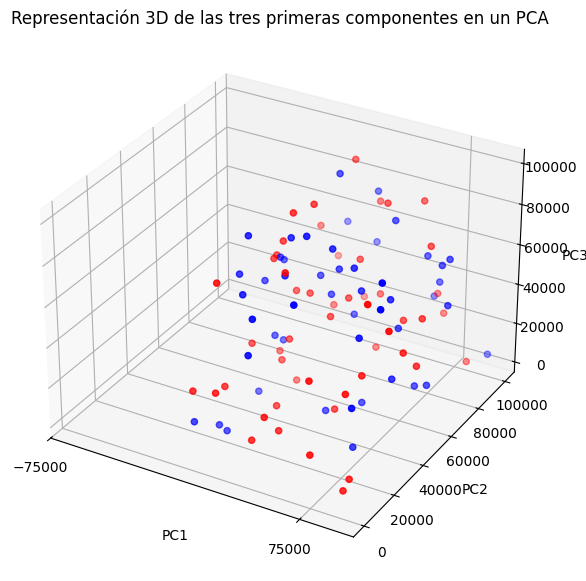

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y_plt, cmap="bwr")

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_xticks([-75000, 75000])

ax.set_title('Representación 3D de las tres primeras componentes en un PCA')

plt.show()

<ipython-input-12-19e39d9a7bcf>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y_plt, cmap=plt.cm.get_cmap("Paired", 2))


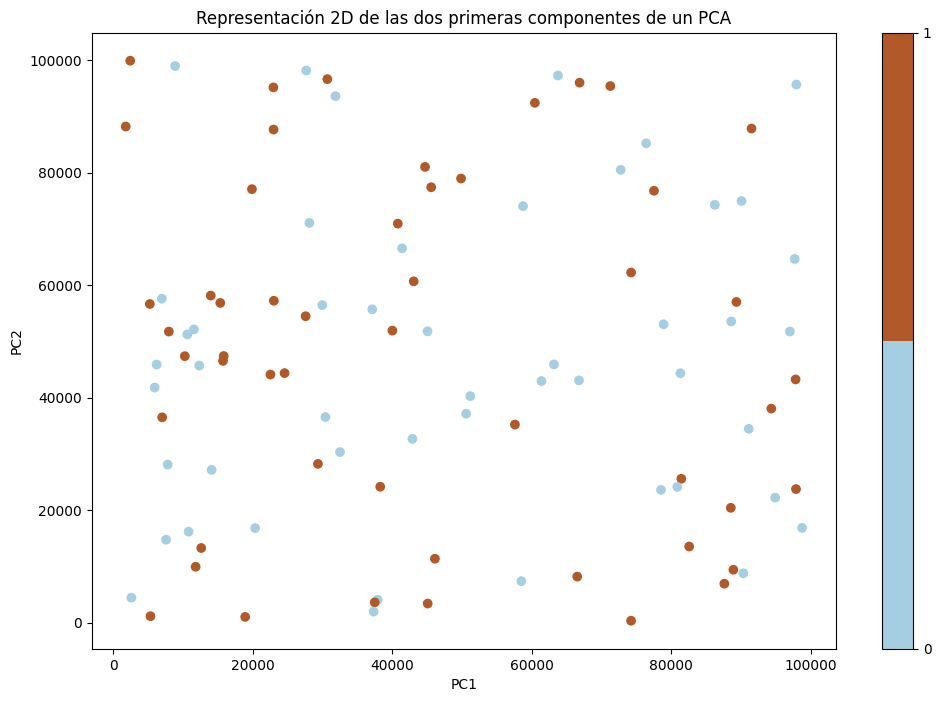

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y_plt, cmap=plt.cm.get_cmap("Paired", 2))
plt.colorbar(ticks=range(2))
plt.title('Representación 2D de las dos primeras componentes de un PCA')
plt.xlabel('PC1'); _=plt.ylabel('PC2')

<ipython-input-15-d2d39bbf994f>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_PCA[:,0], X_PCA[:,2], c=y_plt, cmap=plt.cm.get_cmap("Paired", 2))


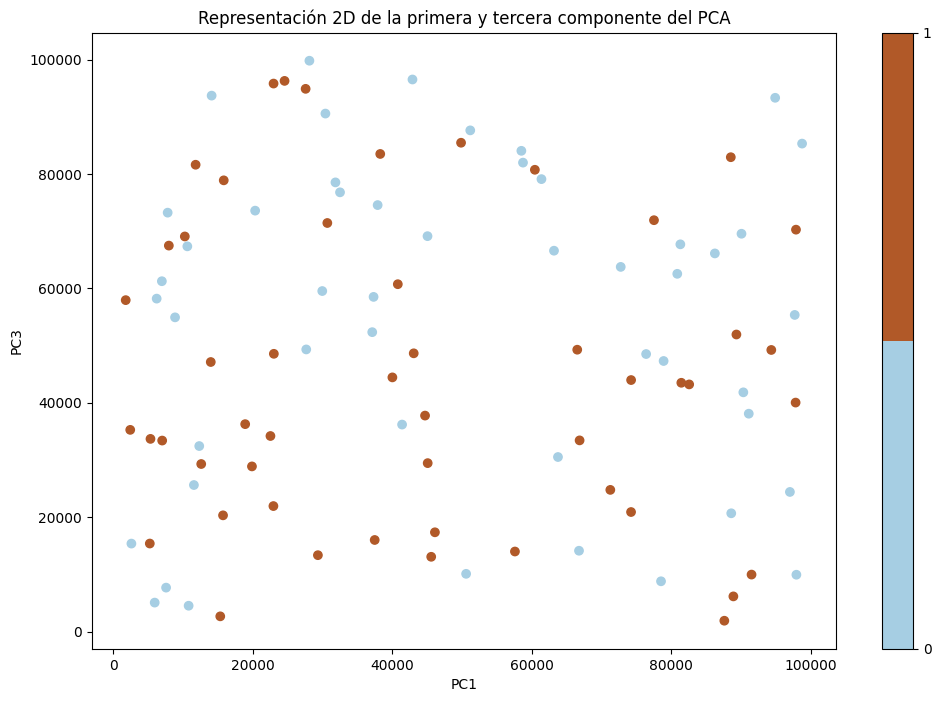

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_PCA[:,0], X_PCA[:,2], c=y_plt, cmap=plt.cm.get_cmap("Paired", 2))
plt.colorbar(ticks=range(2))
plt.title('Representación 2D de la primera y tercera componente del PCA')
plt.xlabel('PC1'); _=plt.ylabel('PC3')

**Nota técnica**
Se utilizará el modelo Local Outlier Factor (LOF) como detector de anomalías, basado en la relación con los vecinos más cercanos. Los datos serán ajustados a las características correspondientes de X


In [ ]:
clf=LocalOutlierFactor(n_neighbors=10,
                        algorithm='auto',
                        leaf_size=30,
                        metric='minkowski',
                        p=2,
                        metric_params=None,
                        n_jobs=-1,
                        novelty=False)

In [ ]:
%%time
clf.fit(X)

CPU times: user 15min 27s, sys: 1.06 s, total: 15min 28s
Wall time: 16min 9s


LocalOutlierFactor(n_jobs=-1, n_neighbors=10)

## <a id='toc1_7_'></a>[Detección de anomalias](#toc0_)

**Nota técnica**
Este sistema identifica las anomalías en el conjunto de datos de forma inversa. Es decir, si deseamos quedarnos con el 2% de los puntos más anómalos, debemos segmentar el conjunto de datos seleccionando los 2% de los valores más bajos en la métrica de anomalía

In [ ]:
factores_lof = clf.negative_outlier_factor_
factores_lof

array([-1.08966725, -1.79355346, -1.04051973, ..., -1.18768882,
       -1.13372595, -1.18104253])

In [ ]:
#Se pone el umbral en 2% como se mencionó
Y_pred_clase = factores_lof.copy()
Y_pred_clase[factores_lof>=np.percentile(factores_lof,2.)] = 0
Y_pred_clase[factores_lof<np.percentile(factores_lof,2.)] = 1

La AUC de la ROC es de: 0.52
La F1 es de: 0.01

Accuracy	0.978
Sensitividad	0.06
Precisión	0.006


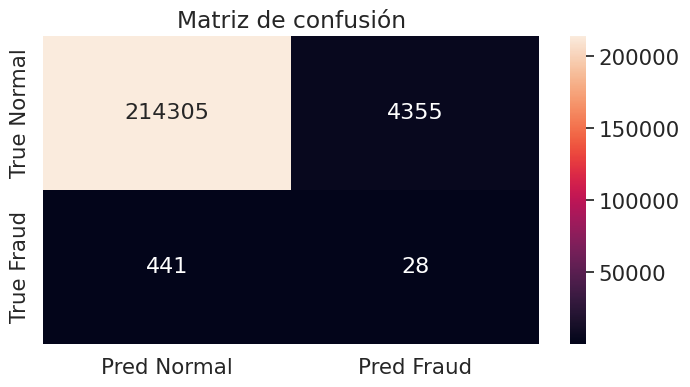

In [ ]:
#Se utiliza la funciona para ver como funciona el modelo ya definida
reporting_modelo(y, Y_pred_clase)

**Nota técnica**
El modelo de redes neuronales parece tener dificultades para capturar patrones en el sistema de detección de fraudes, ya que las métricas obtenidas son extremadamente bajas. Esto sugiere que es necesario reconsiderar y explorar otras posibles soluciones o enfoques.